# Research on Car Sales Ads
Project Report by Allentine Paulis

## Description
This project is to prepare report for research on car sales ads at Crankshaft List. Hundreds of free advertisements for vehicles are published on the site every day.

We need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

## Data
The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

### Step 1. Open the data file and study the general information. 

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [83]:
df = pd.read_csv("https://code.s3.yandex.net/datasets/vehicles_us.csv")

In [84]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [86]:
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

In [87]:
df.describe(include='all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [88]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [89]:
df.isnull().sum()/len(df) * 100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [90]:
count=0
for col in df.columns:
    rows = df[col].isnull().sum()
    percent = df[col].isnull().sum()/len(df)
    if percent > 0:
        count+=1
    print(f"Column {col} has {percent:.2%} of missing values which is {rows} missing rows")
print(f"There are total {count} columns with missing values")

Column price has 0.00% of missing values which is 0 missing rows
Column model_year has 7.02% of missing values which is 3619 missing rows
Column model has 0.00% of missing values which is 0 missing rows
Column condition has 0.00% of missing values which is 0 missing rows
Column cylinders has 10.21% of missing values which is 5260 missing rows
Column fuel has 0.00% of missing values which is 0 missing rows
Column odometer has 15.32% of missing values which is 7892 missing rows
Column transmission has 0.00% of missing values which is 0 missing rows
Column type has 0.00% of missing values which is 0 missing rows
Column paint_color has 17.99% of missing values which is 9267 missing rows
Column is_4wd has 50.37% of missing values which is 25953 missing rows
Column date_posted has 0.00% of missing values which is 0 missing rows
Column days_listed has 0.00% of missing values which is 0 missing rows
There are total 5 columns with missing values


In [91]:
df.duplicated().sum()

0

In [118]:
for col in df.columns:
    df_count = df[col].value_counts()
    print(f" {col} value counts: \n {df_count} \n")

 price value counts: 
 1         798
6995      719
5995      655
4995      624
3500      620
         ... 
49988       1
36600       1
300000      1
39873       1
11762       1
Name: price, Length: 3443, dtype: int64 

 model_year value counts: 
 2011    6994
2013    3549
2012    3468
2014    3448
2015    3323
        ... 
1955       1
1961       1
1949       1
1954       1
1936       1
Name: model_year, Length: 68, dtype: int64 

 model value counts: 
 ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
kia sorento                           236
acura tl                              236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64 

 condition value counts: 
 excellent   

### Conclusion

- There are 51525 rows and 13 columns
- There are 2 integer, 4 float and 7 object dtypes
- The 13 columns are price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed
- There are no duplicated values
- Column model_year has 7.02% of missing values.
- Column cylinders has 10.21% of missing values. 
- Column odometer has 15.32% of missing values. 
- Column paint_color has 17.99% of missing values.
- Column price has 798 value of price with label 1, need more investigation. 
- There are 5 columns with missing values which are model_year, cylinders, odometer, paint_color and is_4wd.
- is_4wd data only contains True boolean values, with 25953 missing rows which are 50.37% missing values. Since the missing values are very large which is half of the data and the data available was only True boolean, we can assumed that the missing values can be False boolean. 
- Column price has 798 values of price with label 1.

### Step 2. Data preprocessing

Fill is_4wd missing values with False boolean which is 0

In [93]:
df['is_4wd'] = df['is_4wd'].fillna(0)

In [94]:
df['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

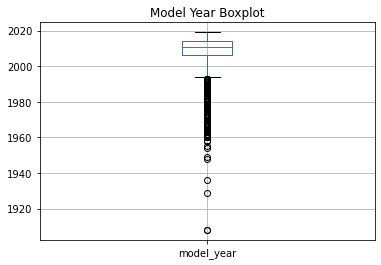

In [95]:
df.boxplot('model_year')
plt.title("Model Year Boxplot")
plt.show()

Fill model_year missing values with median since there are lot of outliers

In [96]:
df['model_year'] = df['model_year'].fillna(df['model_year'].median())

In [97]:
df['model_year'].unique()

array([2011., 2013., 2003., 2017., 2014., 2015., 2012., 2008., 2018.,
       2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966., 1994.,
       2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981., 1995.,
       1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990., 1992.,
       1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965., 1979.,
       1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973., 1970.,
       1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960., 1908.,
       1961., 1936., 1949., 1958., 1929.])

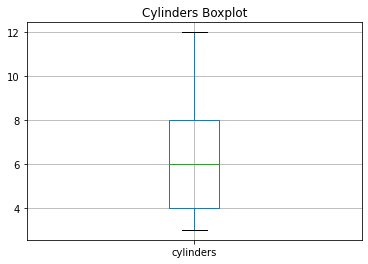

In [98]:
df.boxplot("cylinders")
plt.title("Cylinders Boxplot")
plt.show()

Fill cylinders missing values with mean values since there is no outlier and change the cylinder data type from float to int64

In [99]:
df['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [100]:
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mean()).astype('int64')

In [101]:
df['cylinders'].value_counts()

6     20960
8     15844
4     13864
10      549
5       272
3        34
12        2
Name: cylinders, dtype: int64

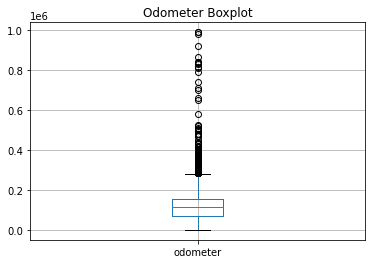

In [102]:
df.boxplot("odometer")
plt.title("Odometer Boxplot")
plt.show()

Fill odometer missing values with median since there is outliers

In [103]:
df['odometer'] = df['odometer'].fillna(df['odometer'].median())

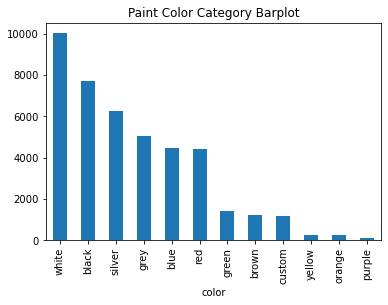

In [104]:
df["paint_color"].value_counts().plot(kind='bar')
plt.title("Paint Color Category Barplot")
plt.xlabel('color')
plt.show()

In [105]:
df["paint_color"].value_counts()/len(df["paint_color"])*100

white     19.464338
black     14.928675
silver    12.118389
grey       9.775837
blue       8.685104
red        8.580301
green      2.709364
brown      2.373605
custom     2.237749
yellow     0.494905
orange     0.448326
purple     0.197962
Name: paint_color, dtype: float64

Fill paint_color missing values with the most frequent value (Mode) which is white color. This observation can't be ignored since the data was not large enough and has 18% missing values, so we need to fill this missing values.

In [107]:
df["paint_color"] = df["paint_color"].fillna(df["paint_color"].mode()[0])

In [110]:
df.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [111]:
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders         int64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

Change model_year data type into int64

In [116]:
df['model_year'] = df['model_year'].astype('int64')

In [117]:
df.dtypes

price             int64
model_year        int64
model            object
condition        object
cylinders         int64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

### Step 3. Make calculations and add them to the table

### Step 4. Carry out exploratory data analysis

### Step 5. Overall conclusion

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [ ]  files explored (first rows printed, info() method)
- [ ]  missing values determined
- [ ]  missing values filled in
- [ ]  clarification of the discovered missing values provided
- [ ]  data types converted
- [ ]  explanation of which columns had the data types changed and why
- [ ]  calculated and added to the table: day of the week, month, and year the ad was placed
- [ ]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [ ]  calculated and added to the table: the vehicle's average mileage per year
- [ ]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [ ]  histograms for each parameter created
- [ ]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [ ]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [ ]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [ ]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [ ]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [ ]  each stage has a conclusion
- [ ]  overall conclusion drawn